#Algorithms for Data Compression
## Huffman, Shannon-Fano, Arithmetic
###Theory, Implementation, Coding, Decoding and Efficiency Calculation


##A quick recap

###Compression
In information theory, data compression is the **process of encoding information** using **fewer bits** than the original representation.

Since I am working with strings, I use *lossless* data compression strategies



###Entropy

All these methods are based on *entropy* and they **give as result a binary code that use less bits for more frequent symbols and more bits for less frequent symbols.**

The entropy *H* of the source describe the quantity of information and it can be calculated as (pseudo code)

$$ H(x) = -\sum p(x)log p(x) $$

###Symbol Frequency

For frequency of a symbol we mean the count of that symbol in the message.

###Symbol Probability

For probability we mean the frequency of that symbol in the message divided for the number of characters of the message.

###Codeword
Every coding technique will generate a binary code to be assigned to every symbol of the string, e.g. a is coded as 1101, that's a codeword.

###Prefix Code
Is a type of code in which no codeword is a prefix of another codeword. In simpler terms, no complete codeword is the beginning part of another complete codeword. This property ensures that when decoding a sequence of codewords, there's no ambiguity in determining where one codeword ends and the next one begins.

###Average Codeword Length
For Huffman and Shannon fano it's possible to calculate an *average codeword length* *L* that can be calculated as

$$ L = \sum_{i=1}^{n}P(x_i) \cdot l(x_i) $$

in which p(x) is the probability of symbol and and l is the codeword length



###Efficienty
Average Codeword Length can be used with Entropy to get an indicator of the Efficienty *E* of the encoding because

E = H/L * 100%






#Messages to be encoded-decoded

I would like to try with three kind of messages:

*   A sentence without any specific characteristic: men should be either treated generously or destroyed, because they take revenge for slight injuries - for heavy ones they cannot.
*   A sentence with all different symbols: abcdefghilmnopqrstuvz123456789_ ,.°àèòù+*|!£$%&()=?^
*   A word with a high frequency for the symbols: missisippi



In [ ]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt

#please choose your message decommenting.

user_input = "men should be either treated generously or destroyed, because they take revenge for slight injuries - for heavy ones they cannot."
#user_input = "abcdefghilmnopqrstuvz123456789_ ,.°àèòù+*|!£$%&()=?^" #this for a very low symbol frequency
#user_input = "missisippi"


#The common part

I'm going to explain how the three algorithms work, but because all the algorithms are based on entropy, all of them need an evaluation of the frequency of the symbols to obtain probabilities, and these probabilities need to be sorted.

As described before, for evaluating the efficiency we need to calculate the entropy of the source, so let's do the calculations now

In [ ]:
from collections import Counter, OrderedDict
#calculating the frequency of the message using Counter class.
counted_symbols = Counter(user_input)

#calculating symbols probability
symbols_probabilities = {k: v / sum(counted_symbols.values()) for k, v in counted_symbols.items()}
#sorted symbols probability
sorted_symbols_probabilities = OrderedDict(sorted(symbols_probabilities.items(), key=lambda kv:kv[1], reverse=True))

#printing in a readable way (a lot of decimals here!)
readable_probabilities = ""
for key,value in sorted_symbols_probabilities.items():
  readable_probabilities = readable_probabilities + f"{key}:{round(value,2)} "

print(readable_probabilities)

e:0.16  :0.16 t:0.07 r:0.07 o:0.06 n:0.05 s:0.05 h:0.05 a:0.04 y:0.04 u:0.03 d:0.03 i:0.03 l:0.02 g:0.02 b:0.02 c:0.02 v:0.02 f:0.02 m:0.01 ,:0.01 k:0.01 j:0.01 -:0.01 .:0.01 


In [ ]:
import math
#Calculating Entropy

#symbols keys
sk=list(sorted_symbols_probabilities.keys())
#symbols values
sv=list(sorted_symbols_probabilities.values())
H = 0
for i in range(0,len(sv)):
  #print(H,"+",sv[i],"*","log_2 of", 1/sv[i])
  H=H+sv[i]*math.log((1/sv[i]),2)

#that looks correct, double check with https://planetcalc.com/2476/
print("Entropy is:",round(H,2),"bits/symbol")


Entropy is: 4.07 bits/symbol


In [ ]:
#calculating average codeword length
def calculate_average_codeword_length(sc,sv):
  """
  sum(number of bits of the codeword of a symbol * probabiliy of the symbol)
  """
  L=0
  for i in range(0,len(sc)):
    #print(len(sc[i]),"*",sv[i],"+")
    L=L+len(sc[i])*sv[i]
    #print(" = ", L)
  return L

#calculating efficiency
def calculate_efficiency(entropy, average_codeword_length):
  #print(entropy)
  #print(average_codeword_length)
  return (entropy/average_codeword_length)*100





#The decoding process
Because the Huffman method and Shannon-Fano take advantage of using **code word** during the encoding process(with the prefixes), they can be decoded in a similar way. Given a dictionary of code words, the encoded string can be analyzed bit by bit until we find a known symbol

In [ ]:
#decoding

def decode(encoded_data, codes):
    """
    that function decode code: given the codes, it gives back the character
    """
    decoded_data = ""
    reverse_codes = {code: char for char, code in codes.items()}
    current_code = ""
    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codes:
            decoded_data += reverse_codes[current_code]
            current_code = ""
    return decoded_data

#Theory about the Huffman Encoding/Decoding

Huffman coding is a **lossless** data compression algorithm. The idea is to assign **variable-length codes** to input characters, lengths of the assigned codes are based on the **frequencies** of corresponding characters.
The variable-length codes assigned to input characters are **Prefix Codes**, means the codes (bit sequences) are assigned in such a way that the code assigned to one character is not the prefix of code assigned to any other character. This is how Huffman Coding makes sure that there is no ambiguity when decoding the generated bitstream.

In this method, we need to sort symbols by frequency. Then, we merge the
symbols with the lower frequency, creating a new symbol with a frequency as the sum of the frequencies of the merged symbols and we put in order, sorting, removing the joined symbols from the list. We keep going until we remain with only one symbol. At this point, we assign (arbitrary) 0 to the left branch and 1 to the right branch.

##example

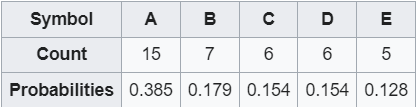

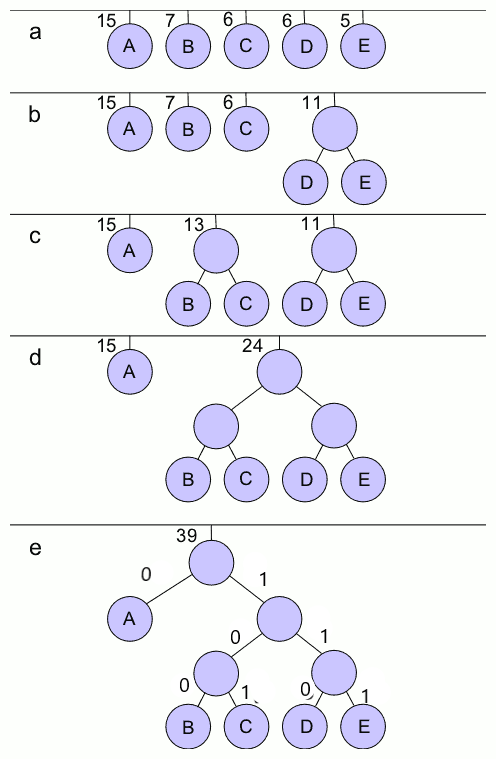


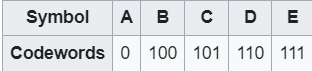

The average code word length is equal to :

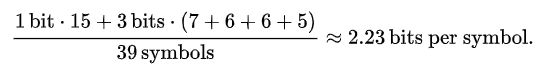






**Let's create the Huffman tree with this implementation**

#Huffman Tree (plotting) code

(that's for plotting the tree)


In [ ]:
from graphviz import Digraph

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

def huffman_graph(char_freq):
    nodes = [Node(char, freq) for char, freq in char_freq.items()]
    while len(nodes) > 1:
        nodes.sort(key=lambda x: x.freq)
        left = nodes.pop(0)
        right = nodes.pop(0)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        nodes.append(merged)
    return nodes[0]

def draw_huffman_graph(node, dot=None):
    if dot is None:
        dot = Digraph()
    if node.char is not None:
        dot.node(str(id(node)), label=f"{node.char}\n{node.freq}")
    else:
        dot.node(str(id(node)), label=str(node.freq))
    if node.left is not None:
        dot.edge(str(id(node)), str(id(node.left)), label="0")
        draw_huffman_graph(node.left, dot)
    if node.right is not None:
        dot.edge(str(id(node)), str(id(node.right)), label="1")
        draw_huffman_graph(node.right, dot)
    return dot



#The Huffman Tree

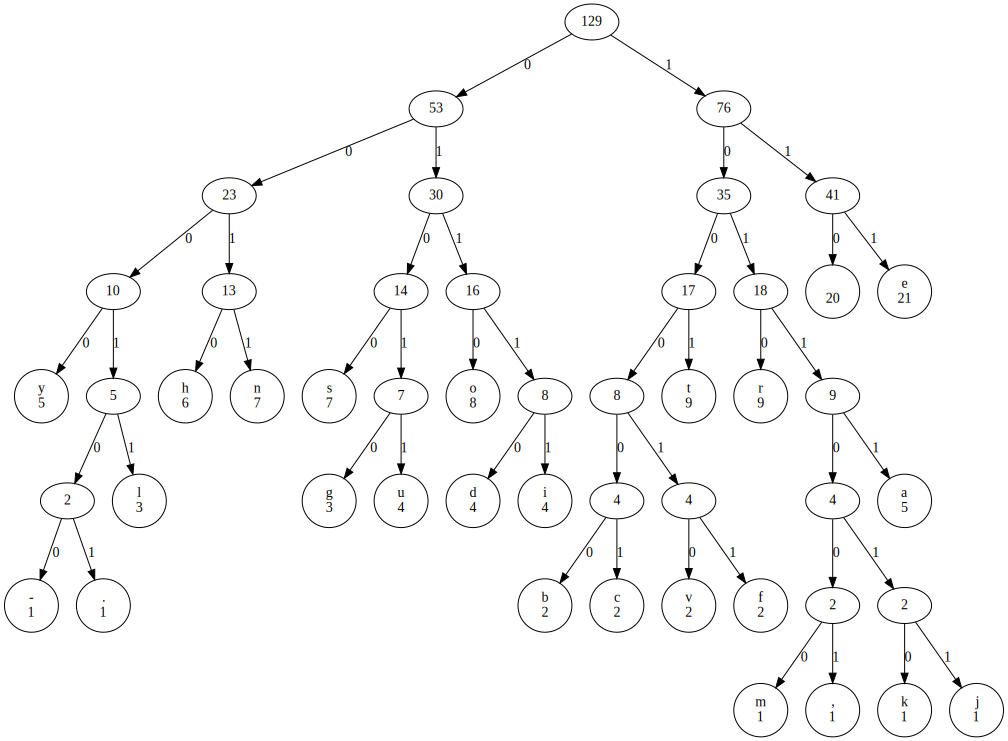

In [ ]:
# Build Huffman tree
root = huffman_graph(counted_symbols)
# Draw Huffman graph
#print(f"the top of the tree should be {len(user_input)} as the sum of the frequency of every symbol is the length of the string")
dot = draw_huffman_graph(root)
#dot.render('huffman_graph', format='png', cleanup=True)
dot

#Huffman (Encoding) Code

In [ ]:
#Huffman implementation
import heapq

#https://en.wikipedia.org/wiki/Heap_(data_structure)
#the heap data structure is used to create binary tree and to have access to
#the lowest value (lowest frequency in our  case) with heappop

class HuffmanNode:
    """
    a class implementing a Huffman Node
    """
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        """
        in a HuffmanNode, an element is less than another if its frequency is less than another
        """
        return self.freq < other.freq

def build_huffman_tree(data):
    #creating a list of HuffmanNode object for every character contained in data
    #for every symbol and frequency on the string to encode,
    #I create an instance of HuffmanNode giving the character and the frequency
    heap = [HuffmanNode(char, freq) for char, freq in Counter(data).items()]

    #transforming heap list in a real heap
    heapq.heapify(heap)

    while len(heap) > 1: #until we have not reached the top of the tree ...
        #left node and right node (leaves) are the two with the lower frequency
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        #creating a new node merging the frequency of the children
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        #filling the heap list with the merged node.
        heapq.heappush(heap, merged)

    return heap[0]

def build_huffman_codes(node, current_code, codes):
    """
    that function traverses the huffman tree gives the code 0 to the left
    part of the tree and 1 to the right part
    """
    if node is not None:
        if node.char is not None:
            codes[node.char] = current_code
        build_huffman_codes(node.left, current_code + '0', codes)
        build_huffman_codes(node.right, current_code + '1', codes)

def get_huffman_codes(data):
    root = build_huffman_tree(data)
    codes = {}
    build_huffman_codes(root, "", codes)
    return codes

def encode_data_with_codes(data,codes):
    encoded_data = "".join(codes[char] for char in data)
    return encoded_data


#Encoding Decoding with Huffman

In [ ]:
#generating huffman codes
huffman_codes = get_huffman_codes(user_input)

huffman_symbols = [key for key,value in sorted_symbols_probabilities.items()]
huffman_probabilities = [value for key,value in sorted_symbols_probabilities.items()]
huffman_codes_list = []
for symbol in huffman_symbols:
  code = huffman_codes[symbol]
  huffman_codes_list.append(code)

from IPython.display import display

data={'Symbol':huffman_symbols,'probability':huffman_probabilities,'codeword':huffman_codes_list}
df=pd.DataFrame(data)
#df.head(len(huffman_symbols))
display(df)

print(f"Huffman codes {huffman_codes}")
print(f"probabilities {sorted_symbols_probabilities} ")
huffman_encoded_string = encode_data_with_codes(user_input, huffman_codes)
print(f"The initial message encoded with Huffman: {huffman_encoded_string}")

decoded_message = decode(huffman_encoded_string, huffman_codes)

print(f"initial message : {user_input} - decoded message : {decoded_message} ")

assert user_input == decoded_message


,Symbol,probability,codeword
0,e,0.162791,111
1,,0.155039,110
2,t,0.069767,1011
3,r,0.069767,1001
4,o,0.062016,0111
5,n,0.054264,0011
6,s,0.054264,0100
7,h,0.046512,0010
8,a,0.038760,10101
9,y,0.038760,0001


Huffman codes {'c': '00000', 'l': '00001', 'y': '0001', 'h': '0010', 'n': '0011', 's': '0100', 'g': '01010', 'i': '01011', 'f': '011000', 'm': '0110010', 'j': '0110011', 'k': '0110100', ',': '0110101', 'v': '011011', 'o': '0111', 'd': '10000', '.': '1000100', '-': '1000101', 'b': '100011', 'r': '1001', 'u': '10100', 'a': '10101', 't': '1011', ' ': '110', 'e': '111'}
probabilities OrderedDict([('e', 0.16279069767441862), (' ', 0.15503875968992248), ('t', 0.06976744186046512), ('r', 0.06976744186046512), ('o', 0.06201550387596899), ('n', 0.05426356589147287), ('s', 0.05426356589147287), ('h', 0.046511627906976744), ('a', 0.03875968992248062), ('y', 0.03875968992248062), ('u', 0.031007751937984496), ('d', 0.031007751937984496), ('i', 0.031007751937984496), ('l', 0.023255813953488372), ('g', 0.023255813953488372), ('b', 0.015503875968992248), ('c', 0.015503875968992248), ('v', 0.015503875968992248), ('f', 0.015503875968992248), ('m', 0.007751937984496124), (',', 0.007751937984496124), ('k'

#Theory about Arithmetic Encoding/Decoding

Arithmetic encoding is a compression technique where a symbol's probability determines its representation in a compressed sequence. It assigns each symbol a **unique range** based on its **probability**, encoding the entire message within a single interval. Decoding involves reverse mapping to retrieve the original message. This method offers high compression rates but requires precision in floating-point arithmetic.

##Pay attention to decimals

**Python by default has a limited precision representing numbers**, that also could be rounded. For a normal use, that's not a problem, but when arithmetic is required, we need exact numbers with virtual infinite decimals. **The decimal python package with the Decimal class implements a way to set the precision required.**

I have used an implementation based on Decimal that I have found Here https://github.com/ahmedfgad/ArithmeticEncodingPython

## Float to binary converting
At the encoding/decoding process of the arithmatic method, we have also calculated the binary code of the float number that is gained from decoding.
This is the method of how it is converted :

Considering a float is made up of an **integral part** and one **fractional part**,for the integral part we divide the number by the base of 2,  repeating the process until the number greater than 0.
For the fractional part, multiply it by 2, and in case there an integral part ignore it, do the multiplying again on the farctional part until :


*   the new multiplication has a 1 on the integral part and 0 on the fractional on
*   you see a repetition on the fractional part(In floating number storage, the computer will allocate 23 bits for the fractional part. So, it's enough to do this above method at max 23 times)

Then we put the integral parts of the outputs of the both examples, putting them by order in the decimal part of the binary mode



## Arithmetic Coding Decoding implementation

In [ ]:
from decimal import Decimal

class ArithmeticEncoding:
    """
    ArithmeticEncoding is a class for building the arithmetic encoding.
    """

    def __init__(self, frequency_table, save_stages=False):
        """
        frequency_table: Frequency table as a dictionary where key is the symbol and value is the frequency.
        save_stages: If True, then the intervals of each stage are saved in a list. Note that setting save_stages=True may cause memory overflow if the message is large
        """

        self.save_stages = save_stages
        if(save_stages == True):
            print("WARNING: Setting save_stages=True may cause memory overflow if the message is large.")

        self.probability_table = self.get_probability_table(frequency_table)

    def get_probability_table(self, frequency_table):
        """
        Calculates the probability table out of the frequency table.

        frequency_table: A table of the term frequencies.

        Returns the probability table.
        """
        total_frequency = sum(list(frequency_table.values()))

        probability_table = {}
        for key, value in frequency_table.items():
            probability_table[key] = value/total_frequency

        return probability_table

    def get_encoded_value(self, last_stage_probs):
        """
        After encoding the entire message, this method returns the single value that represents the entire message.

        last_stage_probs: A list of the probabilities in the last stage.

        Returns the minimum and maximum probabilites in the last stage in addition to the value encoding the message.
        """
        last_stage_probs = list(last_stage_probs.values())
        last_stage_values = []
        for sublist in last_stage_probs:
            for element in sublist:
                last_stage_values.append(element)

        last_stage_min = min(last_stage_values)
        last_stage_max = max(last_stage_values)
        encoded_value = (last_stage_min + last_stage_max)/2

        return last_stage_min, last_stage_max, encoded_value

    def process_stage(self, probability_table, stage_min, stage_max):
        """
        Processing a stage in the encoding/decoding process.

        probability_table: The probability table.
        stage_min: The minumim probability of the current stage.
        stage_max: The maximum probability of the current stage.

        Returns the probabilities in the stage.
        """

        stage_probs = {}
        stage_domain = stage_max - stage_min
        for term_idx in range(len(probability_table.items())):
            term = list(probability_table.keys())[term_idx]
            term_prob = Decimal(probability_table[term])
            cum_prob = term_prob * stage_domain + stage_min
            stage_probs[term] = [stage_min, cum_prob]
            stage_min = cum_prob
        return stage_probs

    def encode(self, msg, probability_table):
        """
        Encodes a message using arithmetic encoding.

        msg: The message to be encoded.
        probability_table: The probability table.

        Returns the encoder, the floating-point value representing the encoded message, and the maximum and minimum values of the interval in which the floating-point value falls.
        """

        msg = list(msg)

        encoder = []

        stage_min = Decimal(0.0)
        stage_max = Decimal(1.0)

        for msg_term_idx in range(len(msg)):
            stage_probs = self.process_stage(probability_table, stage_min, stage_max)

            msg_term = msg[msg_term_idx]
            stage_min = stage_probs[msg_term][0]
            stage_max = stage_probs[msg_term][1]

            if self.save_stages:
                encoder.append(stage_probs)

        last_stage_probs = self.process_stage(probability_table, stage_min, stage_max)

        if self.save_stages:
            encoder.append(last_stage_probs)

        interval_min_value, interval_max_value, encoded_msg = self.get_encoded_value(last_stage_probs)

        return encoded_msg, encoder, interval_min_value, interval_max_value

    def process_stage_binary(self, float_interval_min, float_interval_max, stage_min_bin, stage_max_bin):
        """
        Processing a stage in the encoding/decoding process.

        float_interval_min: The minimum floating-point value in the interval in which the floating-point value that encodes the message is located.
        float_interval_max: The maximum floating-point value in the interval in which the floating-point value that encodes the message is located.
        stage_min_bin: The minimum binary number in the current stage.
        stage_max_bin: The maximum binary number in the current stage.

        Returns the probabilities of the terms in this stage. There are only 2 terms.
        """

        stage_mid_bin = stage_min_bin + "1"
        stage_min_bin = stage_min_bin + "0"

        stage_probs = {}
        stage_probs[0] = [stage_min_bin, stage_mid_bin]
        stage_probs[1] = [stage_mid_bin, stage_max_bin]

        return stage_probs

    def encode_binary(self, float_interval_min, float_interval_max):
        """
        Calculates the binary code that represents the floating-point value that encodes the message.

        float_interval_min: The minimum floating-point value in the interval in which the floating-point value that encodes the message is located.
        float_interval_max: The maximum floating-point value in the interval in which the floating-point value that encodes the message is located.

        Returns the binary code representing the encoded message.
        """

        binary_encoder = []
        binary_code = None

        stage_min_bin = "0.0"
        stage_max_bin = "1.0"

        stage_probs = {}
        stage_probs[0] = [stage_min_bin, "0.1"]
        stage_probs[1] = ["0.1", stage_max_bin]

        while True:
            if float_interval_max < bin2float(stage_probs[0][1]):
                stage_min_bin = stage_probs[0][0]
                stage_max_bin = stage_probs[0][1]
            else:
                stage_min_bin = stage_probs[1][0]
                stage_max_bin = stage_probs[1][1]

            if self.save_stages:
                binary_encoder.append(stage_probs)

            stage_probs = self.process_stage_binary(float_interval_min,
                                                    float_interval_max,
                                                    stage_min_bin,
                                                    stage_max_bin)

            # print(stage_probs[0][0], bin2float(stage_probs[0][0]))
            # print(stage_probs[0][1], bin2float(stage_probs[0][1]))
            if (bin2float(stage_probs[0][0]) >= float_interval_min) and (bin2float(stage_probs[0][1]) < float_interval_max):
                # The binary code is found.
                # print(stage_probs[0][0], bin2float(stage_probs[0][0]))
                # print(stage_probs[0][1], bin2float(stage_probs[0][1]))
                # print("The binary code is : ", stage_probs[0][0])
                binary_code = stage_probs[0][0]
                break
            elif (bin2float(stage_probs[1][0]) >= float_interval_min) and (bin2float(stage_probs[1][1]) < float_interval_max):
                # The binary code is found.
                # print(stage_probs[1][0], bin2float(stage_probs[1][0]))
                # print(stage_probs[1][1], bin2float(stage_probs[1][1]))
                # print("The binary code is : ", stage_probs[1][0])
                binary_code = stage_probs[1][0]
                break

        if self.save_stages:
            binary_encoder.append(stage_probs)

        return binary_code, binary_encoder

    def decode(self, encoded_msg, msg_length, probability_table):
        """
        Decodes a message from a floating-point number.

        encoded_msg: The floating-point value that encodes the message.
        msg_length: Length of the message.
        probability_table: The probability table.

        Returns the decoded message.
        """

        decoder = []

        decoded_msg = []

        stage_min = Decimal(0.0)
        stage_max = Decimal(1.0)

        for idx in range(msg_length):
            stage_probs = self.process_stage(probability_table, stage_min, stage_max)

            for msg_term, value in stage_probs.items():
                if encoded_msg >= value[0] and encoded_msg <= value[1]:
                    break

            decoded_msg.append(msg_term)

            stage_min = stage_probs[msg_term][0]
            stage_max = stage_probs[msg_term][1]

            if self.save_stages:
                decoder.append(stage_probs)

        if self.save_stages:
            last_stage_probs = self.process_stage(probability_table, stage_min, stage_max)
            decoder.append(last_stage_probs)

        return decoded_msg, decoder

def float2bin(float_num, num_bits=None):
    """
    Converts a floating-point number into binary.

    float_num: The floating-point number.
    num_bits: The number of bits expected in the result. If None, then the number of bits depends on the number.

    Returns the binary representation of the number.
    """

    float_num = str(float_num)
    if float_num.find(".") == -1:
        # No decimals in the floating-point number.
        integers = float_num
        decimals = ""
    else:
        integers, decimals = float_num.split(".")
    decimals = "0." + decimals
    decimals = Decimal(decimals)
    integers = int(integers)

    result = ""
    num_used_bits = 0
    while True:
        mul = decimals * 2
        int_part = int(mul)
        result = result + str(int_part)
        num_used_bits = num_used_bits + 1

        decimals = mul - int(mul)
        if type(num_bits) is type(None):
            if decimals == 0:
                break
        elif num_used_bits >= num_bits:
            break
    if type(num_bits) is type(None):
        pass
    elif len(result) < num_bits:
        num_remaining_bits = num_bits - len(result)
        result = result + "0"*num_remaining_bits

    integers_bin = bin(integers)[2:]
    result = str(integers_bin) + "." + str(result)
    return result

def bin2float(bin_num):
    """
    Converts a binary number to a floating-point number.

    bin_num: The binary number as a string.

    Returns the floating-point representation.
    """

    if bin_num.find(".") == -1:
        # No decimals in the binary number.
        integers = bin_num
        decimals = ""
    else:
        integers, decimals = bin_num.split(".")
    result = Decimal(0.0)

    # Working with integers.
    for idx, bit in enumerate(integers):
        if bit == "0":
            continue
        mul = 2**idx
        result = result + Decimal(mul)

    # Working with decimals.
    for idx, bit in enumerate(decimals):
        if bit == "0":
            continue
        mul = Decimal(1.0)/Decimal((2**(idx+1)))
        result = result + mul
    return result

#Coding Decoding with Arithmetic

In [ ]:
#moving the precision to 200 decimals
from decimal import getcontext
getcontext().prec = 200


frequency_table = counted_symbols

AE = ArithmeticEncoding(frequency_table=frequency_table,save_stages=True)

original_msg = user_input
print("Original Message: {msg}".format(msg=original_msg))

# Encode the message
encoded_msg, encoder , interval_min_value, interval_max_value = AE.encode(msg=original_msg, probability_table=AE.probability_table)
print("Encoded Message: {msg}".format(msg=encoded_msg))

# Get the binary code out of the floating-point value
binary_code, encoder_binary = AE.encode_binary(float_interval_min=interval_min_value, float_interval_max=interval_max_value)
print("The binary code is: {binary_code}".format(binary_code=binary_code))

print("\n the stages (printing only some at the beginning to show the process, further the number of digits explode) ")
step = 0
for stage in encoder:

  #break after some rounds, to avoid huge and not readable printing
  if step > 2:
    break

  step+=1
  print(f"\n Stage {step}")
  for symbol_key,symbol_ranges in stage.items():
    print(f"{symbol_key} has range from {symbol_ranges[0]} to {symbol_ranges[1]}")

print("avoiding to show all the stages for keeping readable")

print("\n the stages binary")
print(encoder_binary)

# Decode the message
decoded_msg, decoder = AE.decode(encoded_msg=encoded_msg,msg_length=len(original_msg),probability_table=AE.probability_table)
decoded_msg = "".join(decoded_msg)
print("Decoded Message: {msg}".format(msg=decoded_msg))
print("Message Decoded Successfully? {result}".format(result=original_msg == decoded_msg))

Original Message: men should be either treated generously or destroyed, because they take revenge for slight injuries - for heavy ones they cannot.
Encoded Message: 0.00029499846219258483903402628386573843548023423447411835655814883729781562978880040834265814794382214224209318379541584484003112165615886400074402311165917789148241494407598719978324061121196706636302505
The binary code is: 0.0000000000010011010101010100000010111111010110110101011001001111100110010111110100110110011111110001010111010101100011110011010000111011011000110000111101011100101010011000011101000100001101010000101111100010011001110000111010010010010010100110100101111010010111111000011001111010000101010010011001010101000111010110100100111100100001100111010000110011100100110001000111011010010000010011101100111010110111010111111000010100110111010001001000010000110011011110111011110111001000100010000010100001011000000010101110000011101110000

 the stages (printing only some at the beginning to show the process, furthe

#Theory about Shannon Fano Encoding/Decoding

1.   For a given list of symbols, develop a corresponding list of probabilities or frequency counts so that each symbol’s relative frequency of occurrence is known.
2.   Sort the lists of symbols according to frequency, with the most frequently occurring symbols at the left and the least common at the right.
3.   Divide the list into two parts, with the total frequency counts of the left part being as close to the total of the right as possible.
4.   The left part of the list is assigned the binary digit 0, and the right part is assigned the digit 1. This means that the codes for the symbols in the first part will all start with 0, and the codes in the second part will all start with 1.
5.   Recursively apply the steps 3 and 4 to each of the two halves, subdividing groups and adding bits to the codes until each symbol has become a corresponding code leaf on the tree.







##Example
Considering a situation like this one


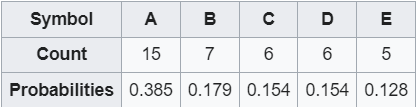

All symbols are sorted by frequency, from left to right. Putting the dividing line between symbols B and C results in a total of 22 in the left group and a total of 17 in the right group. This minimizes the difference in totals between the two groups.

With this division, A and B will each have a code that starts with a 0 bit, and the C, D, and E codes will all start with a 1. Subsequently, the left half of the tree gets a new division between A and B, which puts A on a leaf with code 00 and B on a leaf with code 01.




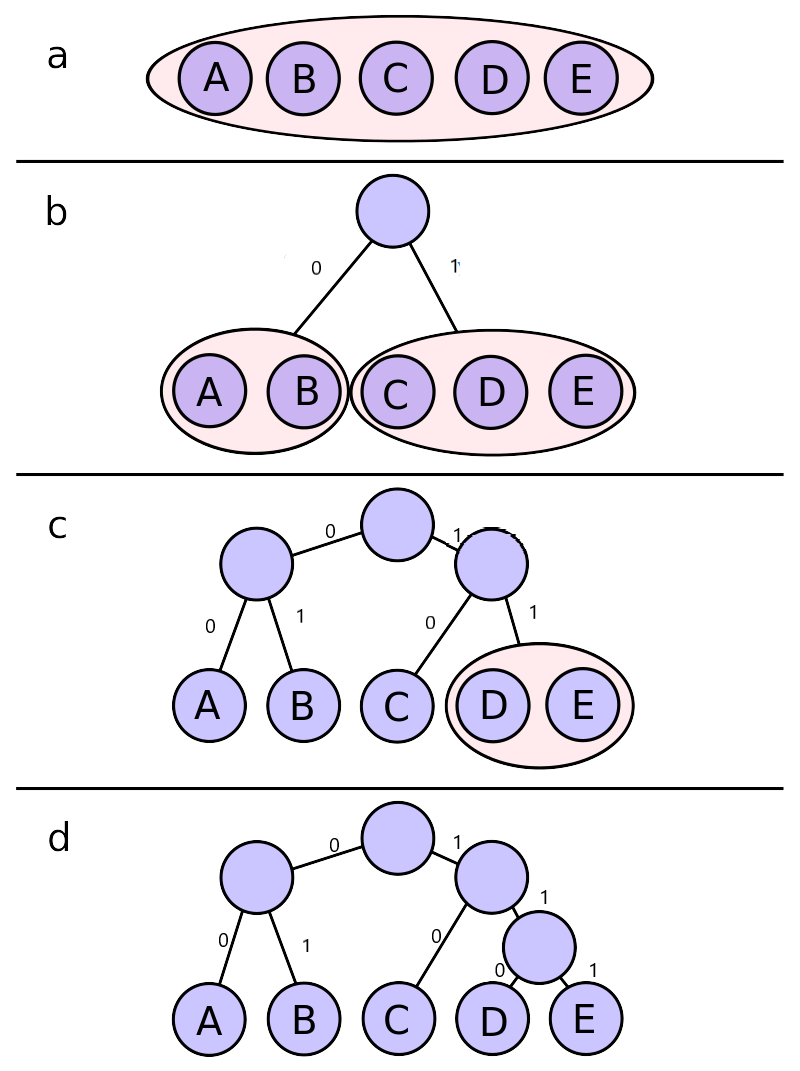



After four division procedures, a tree of codes results. In the final tree, the three symbols with the highest frequencies have all been assigned 2-bit codes, and two symbols with lower counts have 3-bit codes as shown table below:


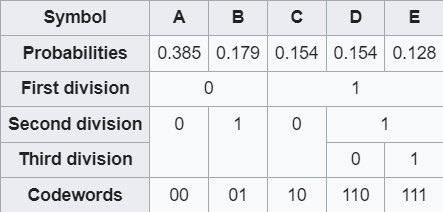

This results in lengths of 2 bits for A, B and C and per 3 bits for D and E, giving an average codeword length of

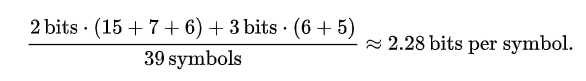


We see that the Huffman code has outperformed Shannon–Fano code( 2.23 vs 2.28)





# Implementation of Shannon Fano

In [ ]:
def best_partition(initial,final):
    print(f"finding best partitions from initial {initial+1} to final {final}")
    pts=[]  #points
    for i in range(initial+1,final):
        diff=abs(sum(sv[initial:i])-sum(sv[i:final]))
        pts.append((diff))

        #that only for a better visualization, avoiding a lot of decimals!
        visualization_sv = [round(elem, 3) for elem in sv]

        print("difference between probs is",round(abs(sum(visualization_sv[initial:i])-sum(visualization_sv[i:final])),3),"considering",visualization_sv[initial:i],"and", visualization_sv[i:final])

    #activate to plot differences in probability regarding the two teams
    # plt.plot([*range(initial,final-1)],pts,color="r")
    # plt.scatter([*range(initial,final-1)],pts,color="k")
    # plt.scatter(initial+pts.index(min(pts)),min(pts),color='b',label="lowest point")
    # plt.xlabel("Index")
    # plt.ylabel("Probability")
    # plt.legend()
    # plt.show()

    if pts.index(min(pts))<initial:
      return pts.index(min(pts))+initial
    else:
      return pts.index(min(pts))

def up(initial,final):
    for i in range(initial,final) : sc[i]=sc[i]+'0'
def down(initial,final):
    for i in range(initial,final) : sc[i]=sc[i]+'1'





#Encoding Decoding with Shannon Fano

In [ ]:
initial=0
final=len(sv)
sc=['']*(len(sv))
current_index=[(initial,final)]
new_index=[]
stage=1
print("Staring")
while current_index!=[]:
    print(f"\nStage {stage}")
    new_index=[]
    for index in current_index:

      if (index[1]-index[0])==2:
        sc[index[0]]=sc[index[0]]+'0'
        sc[index[1]-1]=sc[index[1]-1]+'1'

      if (index[1]-index[0])>2:
          index_ptr=best_partition(index[0],index[1])+1
          new_index.append((index[0],index_ptr))
          up(index[0],index_ptr)
          new_index.append((index_ptr,index[1]))
          down(index_ptr,index[1])

      current_index=new_index

    stage=stage+1

print("Finished.")
print(f"the list of codes {sc}")

codes=[]
for i in range(0,len(sv)):
  codes.append((sk[i],sc[i]));
encoded_dictionary=OrderedDict(codes)



data={'Symbol':sk,'probability':sv,'codeword':sc,}
df=pd.DataFrame(data)
df.head(len(sk))




Staring

Stage 1
finding best partitions from initial 1 to final 25
difference between probs is 0.678 considering [0.163] and [0.155, 0.07, 0.07, 0.062, 0.054, 0.054, 0.047, 0.039, 0.039, 0.031, 0.031, 0.031, 0.023, 0.023, 0.016, 0.016, 0.016, 0.016, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008]
difference between probs is 0.368 considering [0.163, 0.155] and [0.07, 0.07, 0.062, 0.054, 0.054, 0.047, 0.039, 0.039, 0.031, 0.031, 0.031, 0.023, 0.023, 0.016, 0.016, 0.016, 0.016, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008]
difference between probs is 0.228 considering [0.163, 0.155, 0.07] and [0.07, 0.062, 0.054, 0.054, 0.047, 0.039, 0.039, 0.031, 0.031, 0.031, 0.023, 0.023, 0.016, 0.016, 0.016, 0.016, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008]
difference between probs is 0.088 considering [0.163, 0.155, 0.07, 0.07] and [0.062, 0.054, 0.054, 0.047, 0.039, 0.039, 0.031, 0.031, 0.031, 0.023, 0.023, 0.016, 0.016, 0.016, 0.016, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008]
difference between probs is 0.03

,Symbol,probability,codeword
0,e,0.162791,000
1,,0.155039,001
2,t,0.069767,010
3,r,0.069767,0110
4,o,0.062016,0111
5,n,0.054264,1000
6,s,0.054264,1001
7,h,0.046512,1010
8,a,0.038760,10110
9,y,0.038760,10111


## Shannon Fano Codes and CodeWords



In [ ]:
#encoding the message with codes
shannon_encoded_message = ''
for character in user_input:
  code = encoded_dictionary[character]
  print(f" {character} is encodeed with {encoded_dictionary[character]}")
  shannon_encoded_message=shannon_encoded_message+code
print(user_input,"is encoded as", shannon_encoded_message)

#decoding  message with codes
decoded_message = decode(shannon_encoded_message, encoded_dictionary)

print("Decoded message is",decoded_message)

if decoded_message == user_input:
  print("Shannon Fano Encoding Decoding is working!")

 m is encodeed with 1111010
 e is encodeed with 000
 n is encodeed with 1000
   is encodeed with 001
 s is encodeed with 1001
 h is encodeed with 1010
 o is encodeed with 0111
 u is encodeed with 11000
 l is encodeed with 11011
 d is encodeed with 11001
   is encodeed with 001
 b is encodeed with 111001
 e is encodeed with 000
   is encodeed with 001
 e is encodeed with 000
 i is encodeed with 11010
 t is encodeed with 010
 h is encodeed with 1010
 e is encodeed with 000
 r is encodeed with 0110
   is encodeed with 001
 t is encodeed with 010
 r is encodeed with 0110
 e is encodeed with 000
 a is encodeed with 10110
 t is encodeed with 010
 e is encodeed with 000
 d is encodeed with 11001
   is encodeed with 001
 g is encodeed with 111000
 e is encodeed with 000
 n is encodeed with 1000
 e is encodeed with 000
 r is encodeed with 0110
 o is encodeed with 0111
 u is encodeed with 11000
 s is encodeed with 1001
 l is encodeed with 11011
 y is encodeed with 10111
   is encodeed with 001
 


#Huffman & Shannon entropy, average codeword length, efficiency comparison



In [ ]:
'''
ASCII an acronym for American Standard Code for Information Interchange
, is a character encoding standard for electronic communication. ASCII
codes represent text in computers, telecommunications equipment, and other devices.
First a 7-bit binary code was chosen for this type of code, however later by
adding some specific characters the length of the code increased to 8 bits.
'''

#ASCII 8 bit
ascii_lenght = 8*len(user_input)
print(f"in ASCII 8 bit the bitcode would be {ascii_lenght} bits")

#HUFFMAN
huffman_sc = [value for key,value in huffman_codes.items()]
huffman_average_codeword_length = calculate_average_codeword_length(huffman_codes_list, huffman_probabilities)
print(f"Huffman Average Codeword length is: {round(huffman_average_codeword_length,2)} bits/symbol")
huffman_efficiency = calculate_efficiency(H, huffman_average_codeword_length)
print(f"Huffman efficiency is {round(huffman_efficiency,2)}%")
#print(f"Huffman encoded is {huffman_encoded_string}")
huffman_bitcode_length = len(huffman_encoded_string)
print(f"The huffman codeword is {huffman_bitcode_length} long ")
print(f"Compared with a 8 bit ascii code the length of this code is {round(huffman_bitcode_length/ascii_lenght,2)*100}% of ascii ")

#ARITHMETIC

print("\n")
#print(f"Arithmetic encoded is {binary_code}")
arithmetic_bitcode_length = len(binary_code)
print(f"The Arithmetic codeword is {arithmetic_bitcode_length} long ")
print(f"Compared with a 8 bit ascii code the length of this code is {round(arithmetic_bitcode_length/ascii_lenght,3)*100}%  of ascii")


#SHANNON
print("\n")
shannon_average_codeword_length = calculate_average_codeword_length(sc,sv)
print(f"Shannon Average Codeword length is {round(shannon_average_codeword_length,3)} bits/symbol")
shannon_effiency = calculate_efficiency(H, shannon_average_codeword_length)
print(f"Shannon efficiency is {round(shannon_effiency,2)}% ")
#print(f"Shannon encoded is {shannon_encoded_message}")
shannon_bitcode_length = len(shannon_encoded_message)
print(f"The shannon codeword is {shannon_bitcode_length} long ")
print(f"Compared with a 8 bit ascii code the length of this code is {round(shannon_bitcode_length/ascii_lenght,3)*100}% of ascii")


in ASCII 8 bit the bitcode would be 1032 bits
Huffman Average Codeword length is: 4.11 bits/symbol
Huffman efficiency is 99.09%
The huffman codeword is 530 long 
Compared with a 8 bit ascii code the length of this code is 51.0% of ascii 


The Arithmetic codeword is 531 long 
Compared with a 8 bit ascii code the length of this code is 51.5%  of ascii


Shannon Average Codeword length is 4.116 bits/symbol
Shannon efficiency is 98.9% 
The shannon codeword is 531 long 
Compared with a 8 bit ascii code the length of this code is 51.5% of ascii


#Overal comparison between Huffman,Arithmatic and Shannon Fano



*   Shannon Fano codes are almost **never used**, as they are **not** guaranteed to generate an **optimal  prefix code**
*  Huffman coding is almost as **computationally simple** and produces prefix code,which achieves **the lowest possible expected code word length**, under the **constraint** that each symbol is represented by a code formed of an **integral number of bits**

*   This Huffman constraint is often **unneeded**, as the codes would be packed end-to-end in long sequences
(This is because in long sequences of encoded data, the codes can be packed together without needing to align them to specific bit boundaries. This flexibility could potentially allow for even more efficient encoding, especially in scenarios where the data is transmitted or stored in bulk.)
*  In most situations, arithmetic coding can produce **greater overall** **compression** than either Huffman or Shannon–Fano, since it can encode in fractional numbers of bits which more closely approximate the actual information content of the symbol


*   However, arithmatic coding is **computationally expensive**
   
















Sources :

*   [Wikipedia - What is data compression](https://en.wikipedia.org/wiki/Data_compression)
*   [Python documentation - Counter](https://docs.python.org/3/library/collections.html#collections.Counter)
*   [Python documentation - OrdererDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict)
*   [Arithmetic coding implementation](https://github.com/ahmedfgad/ArithmeticEncodingPython)
*   [Shannon Fano implementation](https://en.wikipedia.org/wiki/Shannon%E2%80%93Fano_coding)
*   [Online Huffman Encoder for doublecheck](https://resources.nerdfirst.net/huffman)
*   [Online Huffman Encoder with codewords](https://planetcalc.com/2481/)

*   [float to binary converting](https://https://www.log2base2.com/number-system/float-to-binary-conversion.html)

*   [ASCII](https://en.wikipedia.org/wiki/ASCII#8-bit_codes)






